# 第4章: 言語解析

問題30から問題35までは、以下の文章`text`（太宰治の『走れメロス』の冒頭部分）に対して、言語解析を実施せよ。問題36から問題39までは、国家を説明した文書群（日本語版ウィキペディア記事から抽出したテキスト群）をコーパスとして、言語解析を実施せよ。

In [ ]:
text = """
メロスは激怒した。
必ず、かの邪智暴虐の王を除かなければならぬと決意した。
メロスには政治がわからぬ。
メロスは、村の牧人である。
笛を吹き、羊と遊んで暮して来た。
けれども邪悪に対しては、人一倍に敏感であった。
"""

In [5]:
%%bash
pip install mecab-python3
pip install ipadic
pip install ginza ja_ginza
pip install spacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.8/588.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 79.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ipadic: filename=ipadic-1.0.0-py3-none-any.whl size=13556704 sha256=4d8089f7337f7c91537a6ed5dccf8e4b9f502fa41ead54c1224c443937ff6b6e
  Stored in directory: /root/.cache/pip/wheels/44/56/37/f543963822b85260c9f948df8fac8c20169c80dc71b24dc407
Successfully built ipadic
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.4 MB/s eta 0:00:00


## 30. 動詞
文章`text`に含まれる動詞をすべて表示せよ。

In [ ]:
import MeCab
import ipadic
import pandas as pd
import io

tagger = MeCab.Tagger(ipadic.MECAB_ARGS)
result = tagger.parse(text)
f = io.StringIO(result)

df = pd.read_csv(f, sep='\s',header=None)
df[['品詞', '品詞分類1', '品詞分類2', '品詞分類3', '活用型', '活用形', '原形', '発音', '読み']] = df[1].str.split(',', expand=True)
df

<ipython-input-4-dee5608aa1fb>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(f, sep='\s',header=None)


0                                 1    品詞 品詞分類1 品詞分類2 品詞分類3      活用型  \
0   メロス                   名詞,一般,*,*,*,*,*    名詞    一般     *     *        *   
1     は              助詞,係助詞,*,*,*,*,は,ハ,ワ    助詞   係助詞     *     *        *   
2    激怒        名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド    名詞  サ変接続     *     *        *   
3     し        動詞,自立,*,*,サ変・スル,連用形,する,シ,シ    動詞    自立     *     *    サ変・スル   
4     た          助動詞,*,*,*,特殊・タ,基本形,た,タ,タ   助動詞     *     *     *     特殊・タ   
..  ...                               ...   ...   ...   ...   ...      ...   
62    で          助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ   助動詞     *     *     *     特殊・ダ   
63   あっ  助動詞,*,*,*,五段・ラ行アル,連用タ接続,ある,アッ,アッ   助動詞     *     *     *  五段・ラ行アル   
64    た          助動詞,*,*,*,特殊・タ,基本形,た,タ,タ   助動詞     *     *     *     特殊・タ   
65    。               記号,句点,*,*,*,*,。,。,。    記号    句点     *     *        *   
66  EOS                              None  None  None  None  None     None   

      活用形    原形    発音    読み  
0       *     *  None  None  
1       *     は     ハ     ワ  
2       *    激怒   ゲキド   ゲキド  
3     連用形    する     シ     シ  
4     基本形     た     タ     タ  
..    ...   ...   ...   ...  
62    連用形     だ     デ     デ  
63  連用タ接続    ある    アッ    アッ  
64    基本形     た     タ     タ  
65      *     。     。     。  
66   None  None  None  None  

[67 rows x 11 columns]

In [ ]:
df[df['品詞'] == '動詞'].loc[:, 0]
df[df['品詞'] == '動詞'].iloc[:, 0]

3       し
14     除か
17     なら
21      し
29    わから
43     吹き
47     遊ん
49     暮し
51      来
Name: 0, dtype: object

## 31. 動詞の原型
文章`text`に含まれる動詞と、その原型をすべて表示せよ。

In [ ]:
df[df['品詞'] == '動詞'].loc[:, [0, '原形']]
df[df['品詞'] == '動詞'].iloc[:, [0, 8]]

0   原形
3     し   する
14   除か   除く
17   なら   なる
21    し   する
29  わから  わかる
43   吹き   吹く
47   遊ん   遊ぶ
49   暮し   暮す
51    来   来る

## 32. 「AのB」
文章`text`において、2つの名詞が「の」で連結されている名詞句をすべて抽出せよ。

In [ ]:
condition = df[0] == 'の'
matching_index = df.index[condition]
for i in matching_index:
    print('{}{}{}'.format(df.iloc[i-1, 0], df.iloc[i, 0], df.iloc[i+1, 0]))

暴虐の王
村の牧人


## 33. 係り受け解析

文章`text`に係り受け解析を適用し、係り元と係り先のトークン（形態素や文節などの単位）をタブ区切り形式ですべて抽出せよ。

In [ ]:
import spacy
nlp = spacy.load('ja_ginza')

doc = nlp(text)

for token in doc:
    dependent_token_text = token.text

    head_token_text = token.head.text

    print(f'{dependent_token_text}\t{head_token_text}')


	メロス
メロス	激怒
は	メロス
激怒	激怒
し	激怒
た	激怒
。	激怒

	

必ず	除か
、	必ず
かの	暴虐
邪智	暴虐
暴虐	王
の	暴虐
王	除か
を	王
除か	決意
なけれ	除か
ば	なけれ
なら	なけれ
ぬ	なけれ
と	除か
決意	決意
し	決意
た	決意
。	決意

	メロス
メロス	わから
に	メロス
は	メロス
政治	わから
が	政治
わから	わから
ぬ	わから
。	わから

	メロス
メロス	牧人
は	メロス
、	メロス
村	牧人
の	村
牧人	牧人
で	牧人
ある	で
。	牧人

	笛
笛	吹き
を	笛
吹き	暮し
、	吹き
羊	遊ん
と	羊
遊ん	暮し
で	遊ん
暮し	暮し
て	暮し
来	て
た	暮し
。	暮し

	邪悪
けれど	

も	

邪悪	敏感
に	邪悪
対し	に
ては	に
、	邪悪
人	倍
一	倍
倍	敏感
に	倍
敏感	敏感
で	敏感
あっ	で
た	敏感
。	敏感

	



## 34. 主述の関係
文章`text`において、「メロス」が主語であるときの述語を抽出せよ。

In [ ]:
predicates = []

for token in doc:
    if token.text == 'メロス':
        if token.dep_ in ['nsubj', 'nsubj:outer']:
            predicate = token.head
            predicates.append(predicate)
            print(f"文: {token.sent.text}")
            print(f"主語: {token.text} 関係: {token.dep_}")
            print(f"述語: {predicate.text}")
            print("-" * 10)


if predicates:
    print("\n--- 抽出された述語のリスト ---")
    # 重複を除きたい場合は set に変換してから list に戻す
    # print(list(set(predicates)))
    print(predicates)

文: 
メロスは激怒した。
主語: メロス 関係: nsubj
述語: 激怒
----------
文: 
メロスは、村の牧人である。
主語: メロス 関係: nsubj
述語: 牧人
----------

--- 抽出された述語のリスト ---
[激怒, 牧人]


## 35. 係り受け木
「メロスは激怒した。」の係り受け木を可視化せよ。

In [ ]:
from spacy import displacy
sample_text = 'メロスは激怒した。'

sample_doc = nlp(sample_text)
displacy.render(sample_doc, style='dep', jupyter=True)

## 36. 単語の出現頻度

問題36から39までは、Wikipediaの記事を以下のフォーマットで書き出したファイル[jawiki-country.json.gz](/data/jawiki-country.json.gz)をコーパスと見なし、統計的な分析を行う。

* 1行に1記事の情報がJSON形式で格納される
* 各行には記事名が"title"キーに、記事本文が"text"キーの辞書オブジェクトに格納され、そのオブジェクトがJSON形式で書き出される
* ファイル全体はgzipで圧縮される

まず、第3章の処理内容を参考に、Wikipedia記事からマークアップを除去し、各記事のテキストを抽出せよ。そして、コーパスにおける単語（形態素）の出現頻度を求め、出現頻度の高い20語とその出現頻度を表示せよ。

In [1]:
!git clone https://github.com/Rtosshy/2025.git

Cloning into '2025'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 236 (delta 78), reused 55 (delta 55), pack-reused 130 (from 1)
Receiving objects: 100% (236/236), 25.62 MiB | 10.44 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [1]:
file_path = '/content/2025/data/jawiki-country.json.gz'

In [2]:
import gzip, json

data_list = []

with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        data_list.append(json.loads(line))

In [3]:
import re

pattern = '\'{5}(.+?)\'{5}|\'{3}(.+?)\'{3}|\'{2}(.+?)\'{2}'

repatter = re.compile(pattern)

def replace_func(match):
    return match.group(1) or match.group(2) or match.group(3) or ''

for i, data in enumerate(data_list):
    text = data['text']
    text = re.sub(repatter, replace_func, text)
    text = text.replace('[', '')
    text = text.replace(']', '')
    text = text.replace('|', ' ')
    text = text.replace('{', '')
    text = text.replace('}', '')
    text = text.replace('\n', '')
    data['text'] = text
    data_list[i] = data

pattern = '<.*?>'

repatter = re.compile(pattern, re.DOTALL)

for i, data in enumerate(data_list):
    text = data['text']
    text = re.sub(repatter, '', text)
    data['text'] = text
    data_list[i] = data

print(data_list)

[{'title': 'エジプト', 'text': 'otheruses 主に現代のエジプト・アラブ共和国 古代 古代エジプト基礎情報 国 略名 =エジプト 漢字書き=埃及 日本語国名 =エジプト・アラブ共和国 公式国名 =lang ar جمهورية مصر العربية 国旗画像 =Flag of Egypt.svg 国章画像 =ファイル:Coat_of_arms_of_Egypt.svg 100px エジプトの国章 国章リンク =（エジプトの国章 国章） 標語 =なし 位置画像 =Egypt (orthographic projection).svg 公用語 =アラビア語 首都 =File:Flag of Cairo.svg 24px カイロ 最大都市 =カイロ 元首等肩書 =近代エジプトの国家元首の一覧 大統領 元首等氏名 =アブドルファッターフ・アッ＝シーシー 首相等肩書 =ill2 エジプトの首相 en Prime Minister of Egypt label=首相 首相等氏名 =仮リンク ムスタファ・マドブーリー ar مصطفى مدبولي en Moustafa Madbouly 面積順位 =29 面積大きさ =1 E12 面積値 =1,010,408 水面積率 =0.6% 人口統計年 =2012 人口順位 = 人口大きさ =1 E7 人口値 =1億人 人口密度値 =76 GDP統計年元 =2018 GDP値元 =4兆4,374億IMF Data and Statistics 2020年2月3日閲覧（https://www.imf.org/external/pubs/ft/weo/2019/02/weodata/weorept.aspx?sy=2017&ey=2024&scsm=1&ssd=1&sort=country&ds=.&br=1&c=469&s=NGDP%2CNGDPD%2CPPPGDP%2CNGDPDPC%2CPPPPC&grp=0&a=&pr.x=57&pr.y=4） GDP統計年MER =2018 GDP順位MER =45 GDP値MER =2,496億 GDP統計年 =2018 GDP順位 =21 GDP値 =1兆2,954億 GDP/人 =13,358 建国形態 =独立&nbsp;-&nbsp;日付 建国年月日 =イギ

## 37. 名詞の出現頻度
コーパスにおける名詞の出現頻度を求め、出現頻度の高い20語とその出現頻度を表示せよ。

In [ ]:
import MeCab
import ipadic # MeCab Taggerの初期化に必要に応じて使用
from collections import Counter

tagger = MeCab.Tagger(ipadic.MECAB_ARGS)

total_noun_counts = Counter()
processed_texts_count = 0

# data_list の各要素を処理
for index, item in enumerate(data_list):
    # 'text' キーからテキスト内容を取得
    text_to_analyze = item.get('text', '') # textキーがない場合は空文字

    # 現在のテキストから抽出する名詞を一時的に格納するリスト
    nouns_in_current_text = []
    node = tagger.parseToNode(text_to_analyze)
    while node:
        # 品詞情報 (例: "名詞,一般,*,*,*,*,*,名詞,メイシ,メイシ")
        features = node.feature.split(',')
        pos = features[0]  # 品詞

        if pos == "名詞":
            word_surface = node.surface # 表層形
            # word_base = features[6] # 原形 (必要であればこちらを使用)
            if word_surface: # 空の文字列でないことを確認
                nouns_in_current_text.append(word_surface)
        node = node.next

    # このテキストで抽出された名詞を全体のカウンターに加算
    if nouns_in_current_text:
        total_noun_counts.update(nouns_in_current_text)
    processed_texts_count +=1

# 結果の表示
if total_noun_counts:
    print("--- 名詞の出現回数ランキング (上位20件) ---")
    for noun, count in total_noun_counts.most_common(20): # most_common(N) で上位N件を取得
        print(f"{noun}: {count} 回")

    # 全ての名詞と回数を表示したい場合は以下のようにします
    # print("\n--- 全ての名詞と出現回数 ---")
    # for noun, count in sorted(total_noun_counts.items(), key=lambda item: item[1], reverse=True):
    #     print(f"{noun}: {count} 回")
else:
    print("テキストから名詞は抽出されませんでした。")

--- 名詞の出現回数ランキング (上位20件) ---
年: 30093 回
月: 13648 回
1: 10506 回
日: 10382 回
人: 10097 回
2: 9501 回
国: 9034 回
en: 7018 回
www: 6121 回
語: 6023 回
3: 5915 回
http: 5619 回
的: 5227 回
4: 4972 回
世界: 4786 回
こと: 4604 回
of: 4599 回
5: 4583 回
日本: 4500 回
リンク: 4373 回


## 38. TF・IDF
日本に関する記事における名詞のTF・IDFスコアを求め、TF・IDFスコア上位20語とそのTF, IDF, TF・IDFを表示せよ。

In [4]:
import MeCab
import ipadic
from collections import Counter
import pandas as pd

japan_text = ''

for item in data_list:
    if item.get('title') == '日本':
        japan_text = item.get('text', '')
        break

tagger = MeCab.Tagger(ipadic.MECAB_ARGS)
tagger.parse('')
node = tagger.parseToNode(japan_text)
japan_nouns_list = []

while node:
    features = node.feature.split(',')
    if features[0] == '名詞':
        japan_nouns_list.append(node.surface)
    node = node.next

In [5]:
noun_term_counts = Counter(japan_nouns_list)

total_nouns_in_japan_article = len(japan_nouns_list)
tf_scores_japan = {}

if total_nouns_in_japan_article > 0:
    for noun, count in noun_term_counts.items():
        tf_scores_japan[noun] = count / total_nouns_in_japan_article

In [17]:
import math

target_nouns_from_japan_article = list(tf_scores_japan.keys())

doc_freq = Counter()
total_documents = len(data_list)
print(total_documents)

for i, item in enumerate(data_list):
    text_to_analyze = item.get('text', '')
    tagger.parse('')
    node = tagger.parseToNode(text_to_analyze)
    doc_nouns = []
    while node:
        features = node.feature.split(',')
        if features[0] == '名詞':
            doc_nouns.append(node.surface)
        node = node.next

    doc_nouns_set = set(doc_nouns)


    for noun in target_nouns_from_japan_article:
        if noun in doc_nouns_set:
            doc_freq[noun] += 1
idf_scores = {}

for noun in target_nouns_from_japan_article:
    df_val = doc_freq.get(noun, 0)
    idf_scores[noun] = math.log(total_documents / (df_val+1)) + 1

sorted_idf_scores = sorted(idf_scores.items(), key=lambda item: item[1], reverse=True)
df_idf_scores = pd.DataFrame(sorted_idf_scores, columns=['名詞', 'IDFスコア'])
print(df_idf_scores.head(200))
print(doc_freq)

248
        名詞    IDFスコア
0       表徴  5.820282
1       印章  5.820282
2       大日  5.820282
3        菊  5.820282
4       Wd  5.820282
..     ...       ...
195     広足  5.820282
196     講述  5.820282
197      鈔  5.820282
198  kosho  5.820282
199  bunko  5.820282

[200 rows x 2 columns]
Counter({'年': 246, '2': 246, '3': 246, '国': 245, '1': 245, 'www': 245, 'ISO': 245, '3166': 245, 'en': 245, 'of': 244, 'svg': 244, '月': 243, '人': 243, '関連': 243, 'px': 242, 'リンク': 242, 'http': 242, '日': 241, '4': 241, '項目': 241, '経済': 241, 'GDP': 240, '歴史': 240, '世界': 239, 'こと': 239, '外部': 239, '8': 238, '語': 238, 'Flag': 238, '位置': 238, '5': 238, '行政': 238, '的': 238, '政府': 237, '地理': 237, '人口': 237, 'ため': 237, '名': 236, 'Category': 236, '面積': 235, '国際': 235, '7': 235, '12': 235, 'thumb': 235, '公用': 233, '政治': 233, '地': 233, '6': 232, '公式': 231, '現在': 230, '11': 230, 'title': 230, 'jpg': 230, '英語': 230, '者': 230, '宗教': 230, '国歌': 229, 'https': 229, '9': 229, 'html': 228, '地域': 228, '通貨': 227, '10': 227, '独立': 22

In [18]:
import pandas as pd
import math

tfidf_scores = {}
all_results_data = []

for noun, tf_score in tf_scores_japan.items():
    idf_score = idf_scores.get(noun, 0)
    if tf_score is not None and idf_score is not None:
        calculated_tfidf_score = tf_score * idf_score
        tfidf_scores[noun] = calculated_tfidf_score
        all_results_data.append({
            '名詞': noun,
            'TF': tf_score,
            'IDF': idf_score,
            'TF-IDF': calculated_tfidf_score
        })

results_df = pd.DataFrame(all_results_data)

sorted_results_df = results_df.sort_values(by='TF-IDF', ascending=False)

print(sorted_results_df.head(20).to_string())

          名詞        TF       IDF    TF-IDF
11        日本  0.024040  1.110751  0.026703
5          年  0.021105  1.004040  0.021191
162        日  0.008462  1.024491  0.008669
7          月  0.008217  1.016261  0.008351
10         2  0.008095  1.004040  0.008128
865        県  0.004671  1.529822  0.007146
18         国  0.006701  1.008097  0.006755
112       天皇  0.001859  3.623057  0.006734
132        3  0.006261  1.004040  0.006286
383       琉球  0.001223  5.127134  0.006269
141        E  0.005405  1.106257  0.005979
170       jp  0.005380  1.101783  0.005928
152      web  0.004744  1.225162  0.005813
123        1  0.005747  1.008097  0.005794
419        的  0.005429  1.036965  0.005630
166    https  0.005209  1.075349  0.005602
1096       倭  0.001125  4.903991  0.005517
1110      倭国  0.000978  5.414816  0.005297
471       中国  0.003008  1.685115  0.005069
1447  kyushu  0.000978  5.127134  0.005016


## 39. Zipfの法則
コーパスにおける単語の出現頻度順位を横軸、その出現頻度を縦軸として、両対数グラフをプロットせよ。

In [19]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 33.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=2ceffab7de6380271d0bbbf08bdd06294c07d5cc4eab5f6e8b0bc3eb611a9209
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib


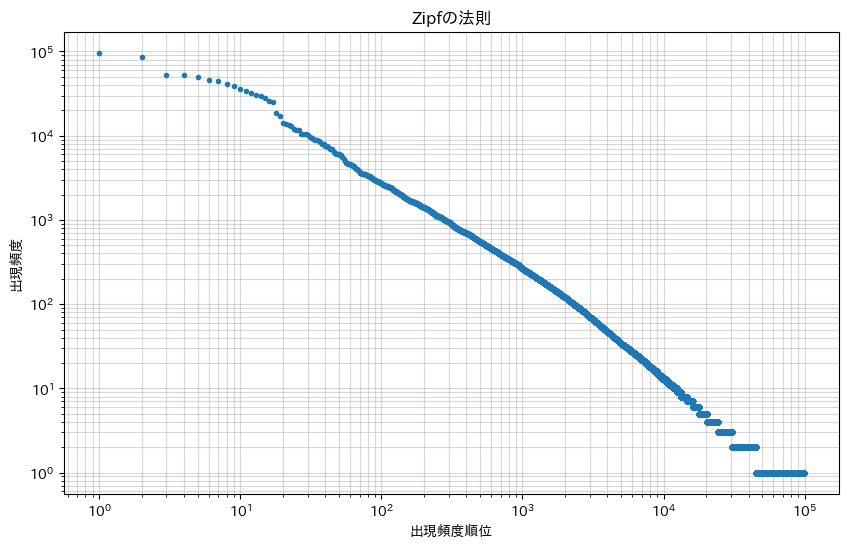

In [20]:
import MeCab
import ipadic
from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib

corpus_word_counts = Counter()
total_documents = len(data_list)

for i, item in enumerate(data_list):
    text_to_analyze = item.get('text', '')
    tagger.parse('')
    node = tagger.parseToNode(text_to_analyze)
    while node:
        if node.surface:
            corpus_word_counts[node.surface] += 1
        node = node.next

sorted_word_frequencies = corpus_word_counts.most_common()

frequencies = [item[1] for item in sorted_word_frequencies]

ranks = list(range(1, len(frequencies) + 1))

plt.figure(figsize=(10, 6))
plt.plot(ranks, frequencies, marker='.', linestyle='none')

plt.xscale('log')
plt.yscale('log')

plt.title('Zipfの法則')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.grid(True, which="both", ls="-", alpha=0.5) # グリッド線を表示

plt.show()